## Data Description
This dataset represents the percent of population
with access to the electricity across countries and over the time. this data comes from he World Bank and the Sustainable Energy for All (SE4ALL) program. the aim is to evaluation the improvement of electrification worldwide
and monitor the progress toward sustainable development Goal 7.


In [2]:
# import the libraries for data analysis and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# import the dataset
electricity = pd.read_csv('/content/access_electricity.csv')

### Initial Exploration
In this section, we explore the basic structure and contents of the dataset  
to understand its dimensions, variables, and data quality. We check the first rows, inspect the data types, and examine summary statistic.

In [4]:
# Display the first few rows
electricity.head()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe


In [5]:
electricity.describe()

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
count,242,242,242,242,242,242,242,242,242,228
unique,242,242,1,1,160,159,153,144,122,6
top,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Africa
freq,1,1,242,242,79,82,87,94,119,56


In [6]:
electricity.shape

(242, 10)

In [7]:
# This will show the name of each columns of the dataset
electricity.columns

Index(['Country Name', 'Country Code', 'Series Name', 'Series Code',
       '2012 [YR2012]', '2013 [YR2013]', '2014 [YR2014]', '2015 [YR2015]',
       '2016 [YR2016]', 'Continent'],
      dtype='object')

The .info() function show the numbers of rows,columns and type of variables.The data types are object, the data related to the year need to be change to float. also with this function i can see that for the continent column there are some cells with null value.this values must be handled.

In [8]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   242 non-null    object
 1   Country Code   242 non-null    object
 2   Series Name    242 non-null    object
 3   Series Code    242 non-null    object
 4   2012 [YR2012]  242 non-null    object
 5   2013 [YR2013]  242 non-null    object
 6   2014 [YR2014]  242 non-null    object
 7   2015 [YR2015]  242 non-null    object
 8   2016 [YR2016]  242 non-null    object
 9   Continent      228 non-null    object
dtypes: object(10)
memory usage: 19.0+ KB


## Cleaning the data
with using the .unique() on the continent i found the name of each continent inside this dataset. there is cells with 'NA' value inside it for the continent. so i try to find the name of countries related to this NA continent value and correct them

In [9]:
# with .unique() i will check the unique continents name
electricity['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'Oceania', 'North America',
       'South America', nan], dtype=object)

with .isna() on the continent i get the data related to the name of countries
related to the NA value. it shows that these countries does not real countries name. so i will drop  these rows related to these wrong data.

In [10]:
# with .isna() i see the countries name which their continent are NA
electricity[electricity['Continent'].isna()][['Country Name']]

,Country Name
69,Europe & Central Asia
70,Europe & Central Asia (excluding high income)
92,Heavily indebted poor countries (HIPC)
93,High income
121,Least developed countries: UN classification
128,Low & middle income
129,Low income
130,Lower middle income
145,Middle East & North Africa
146,Middle East & North Africa (excluding high inc...


In [11]:
#Visually i saw that some of data like data related to the American Samoa are filled with '..'.
# i controlled it when i check the data with .head()
electricity[electricity['Country Name'] == 'American Samoa']

,Country Name,Country Code,Series Name,Series Code,2012 [YR2012],2013 [YR2013],2014 [YR2014],2015 [YR2015],2016 [YR2016],Continent
3,American Samoa,ASM,Access to electricity (% of population),EG.ELC.ACCS.ZS,..,..,..,..,..,Oceania


In [12]:
# search for all cells with this type of filling and fill them with NaN
electricity.replace(["..","NA"],np.nan,inplace =True)

In [13]:
electricity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 242 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   242 non-null    object
 1   Country Code   242 non-null    object
 2   Series Name    242 non-null    object
 3   Series Code    242 non-null    object
 4   2012 [YR2012]  240 non-null    object
 5   2013 [YR2013]  240 non-null    object
 6   2014 [YR2014]  240 non-null    object
 7   2015 [YR2015]  239 non-null    object
 8   2016 [YR2016]  239 non-null    object
 9   Continent      228 non-null    object
dtypes: object(10)
memory usage: 19.0+ KB


In [14]:
# with .dropna() i will drop rows i filled with nan
electricity.dropna(inplace=True)

In [15]:
# now again with .info() i will check all the rows
electricity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 241
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Country Name   226 non-null    object
 1   Country Code   226 non-null    object
 2   Series Name    226 non-null    object
 3   Series Code    226 non-null    object
 4   2012 [YR2012]  226 non-null    object
 5   2013 [YR2013]  226 non-null    object
 6   2014 [YR2014]  226 non-null    object
 7   2015 [YR2015]  226 non-null    object
 8   2016 [YR2016]  226 non-null    object
 9   Continent      226 non-null    object
dtypes: object(10)
memory usage: 19.4+ KB


In [16]:
# change the names of the year columns for better readability
electricity = electricity.rename(columns={'2012 [YR2012]':'2012','2013 [YR2013]':'2013','2014 [YR2014]':'2014',
'2015 [YR2015]':'2015','2016 [YR2016]':'2016'})

Now the data look more clean. i will do the other evaluation on the data set

In [18]:
electricity.head(5)

,Country Name,Country Code,Series Name,Series Code,2012,2013,2014,2015,2016,Continent
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.1,67.2595520019531,89.5,71.5,84.1371383666992,Asia
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.7646604654583,99.1349868774414,99.2343444824219,99.3367080688477,99.439567565918,Africa
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100,100,100,100,100,Europe
5,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,35.821964263916,36.9904899597168,32,42,40.5206069946289,Africa


## Change the type of data
Since all the data was imported as object type, it needs to be converted to float in order to perform calculations and visualizations. With the object data type, numerical evaluation is not possible.

In [19]:
# change the dtype float for years to float
year_column = ['2012', '2013', '2014', '2015', '2016']
electricity[year_column] = electricity[year_column].apply(pd.to_numeric)

In [20]:
# check again to confrim that the columns related to the year now filled with
#float values
electricity.info()

<class 'pandas.core.frame.DataFrame'>
Index: 226 entries, 0 to 241
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  226 non-null    object 
 1   Country Code  226 non-null    object 
 2   Series Name   226 non-null    object 
 3   Series Code   226 non-null    object 
 4   2012          226 non-null    float64
 5   2013          226 non-null    float64
 6   2014          226 non-null    float64
 7   2015          226 non-null    float64
 8   2016          226 non-null    float64
 9   Continent     226 non-null    object 
dtypes: float64(5), object(5)
memory usage: 19.4+ KB


i do the check for the number of unique countries and also unique name of continents
with .nunique() and .unique()

In [21]:
# 16 countries had lack of data so they were dropped
electricity['Country Name'].nunique()

226

In [22]:
electricity['Continent'].unique()

array(['Asia', 'Europe', 'Africa', 'North America', 'South America',
       'Oceania'], dtype=object)

The dataset has been cleaned, and the columns previously stored as object type have been converted to float. It is now ready for analysis.

# 4 data selections with a justification for each; two of them must use .loc[] and two using .iloc[]

### Evaluating electricity access in Asia (2016)
To assess the progress of electrification in Asia, the dataset was filtered to identify countries  
where electricity access in 2016 exceeded 95%. The number of such countries was then compared  
to the total number of Asian countries in the dataset.

In [18]:
# Check the countries in Asia with electrification higher than 95% in 2016
electricity_asia_95_2016 = electricity[(electricity['Continent']=='Asia') &
 (electricity['2016'] > 95)]
electricity_asia_95_2016['Continent'].value_counts()

,count
Continent,
Asia,40


In [19]:
# Evaluate the total number of countries in Asia
electricity_asia = electricity[electricity['Continent'] == 'Asia']
electricity_asia['Continent'].value_counts()

,count
Continent,
Asia,55


This calculation provides the percentage of Asian nations that had achieved near-universal  
electrification by 2016 — approximately **73%**.

In [20]:
# Get the percentage of countries in Asia that covered more than 95% electricity
# in 2016 over
# the total number of countries in Asia

asia_high = electricity_asia_95_2016['Continent'].value_counts()
asia_total = electricity_asia['Continent'].value_counts()
percentage = asia_high/asia_total *100
round(percentage,1)

,count
Continent,
Asia,72.7


In [45]:
# Use loc to show just the first 10 countries and their electricication in 2016

electricity.loc[:10,['Country Name','2016']]

,Country Name,2016
0,Afghanistan,84.137138
1,Albania,100.000000
2,Algeria,99.439568
4,Andorra,100.000000
5,Angola,40.520607
6,Antigua and Barbuda,97.354668
7,Arab World,88.768654
8,Argentina,100.000000
9,Armenia,100.000000
10,Aruba,95.570145


### Evaluating electricity access in Africa (2016)

To examine the state of electrification in Africa, the dataset was divided into two groups:  
countries with electricity access **above 80%** and those **below 80%** in 2016.  
The comparison between these groups shows the proportion of African nations that still face significant challenges in achieving widespread access to electricity.  

In [23]:
# the electricity related to the African countries with above than 80%
# electrification in 2016
africa_a80_2016 = electricity.loc[(electricity['Continent']=='Africa')&
 (electricity['2016']>80),['Country Name','2016','Continent']]
africa_a80_2016

,Country Name,2016,Continent
2,Algeria,99.439568,Africa
33,Cabo Verde,92.611588,Africa
61,"Egypt, Arab Rep.",100.000000,Africa
77,Gabon,91.395500,Africa
125,Libya,98.536728,Africa
142,Mauritius,98.781784,Africa
152,Morocco,100.000000,Africa
189,Seychelles,100.000000,Africa
197,South Africa,84.200000,Africa
220,Tunisia,100.000000,Africa


In [24]:
# the electricity related to the African countries with less than 80% electrification in 2016
africa_b80_2016 = electricity.loc[(electricity['Continent']=='Africa')& (electricity['2016']<80),['Country Name','2016','Continent']]
africa_b80_2016

,Country Name,2016,Continent
5,Angola,40.520607,Africa
21,Benin,41.402615,Africa
26,Botswana,60.688396,Africa
31,Burkina Faso,19.164713,Africa
32,Burundi,7.588477,Africa
35,Cameroon,60.074768,Africa
38,Central African Republic,13.985112,Africa
39,Chad,8.830898,Africa
44,Comoros,77.844215,Africa
45,"Congo, Dem. Rep.",17.147379,Africa


In [25]:
# the number of countries in Africa with higher than 80% of access to electriity
# and less than 80% of access to electricity
africa_low = africa_b80_2016['Continent'].value_counts()
africa_high = africa_a80_2016['Continent'].value_counts()
(africa_low ,africa_high)

(Continent
 Africa    46
 Name: count, dtype: int64,
 Continent
 Africa    10
 Name: count, dtype: int64)

In [26]:
electricity_africa = electricity[electricity['Continent'] == 'Africa']
electricity_africa['Continent'].value_counts()

,count
Continent,
Africa,56



The results reveal that a considerable percentage of African countries remain below the 80% electrification threshold, highlighting ongoing regional disparities and the need for further development efforts to reach universal energy access.

In [27]:
# this identify that still many countries in Africa have challenge in order to
# access to electricity
africa_low = africa_b80_2016['Continent'].value_counts()
total_africa = electricity_africa['Continent'].value_counts()
round(africa_low/total_africa *100,1)

,count
Continent,
Africa,82.1


In [51]:
# the first 10 countries ,their continent and the percentage of electrificaiton
# in different years
electricity.iloc[:10,[0,4,5,6,7,8,9]]

,Country Name,2012,2013,2014,2015,2016,Continent
0,Afghanistan,69.100000,67.259552,89.500000,71.500000,84.137138,Asia
1,Albania,100.000000,100.000000,100.000000,100.000000,100.000000,Europe
2,Algeria,98.764660,99.134987,99.234344,99.336708,99.439568,Africa
4,Andorra,100.000000,100.000000,100.000000,100.000000,100.000000,Europe
5,Angola,35.821964,36.990490,32.000000,42.000000,40.520607,Africa
6,Antigua and Barbuda,95.254692,95.773552,96.298416,96.826294,97.354668,North America
7,Arab World,87.288244,88.389705,88.076774,88.517967,88.768654,Asia
8,Argentina,99.584412,99.837128,99.959244,99.995209,100.000000,South America
9,Armenia,99.878876,99.954056,99.988976,100.000000,100.000000,Asia
10,Aruba,94.255814,94.578262,94.906723,95.238182,95.570145,North America


In [52]:
# Access to electricity for the last 10 countries according selective Years
electricity.iloc[-10:,:9]

,Country Name,Country Code,Series Name,Series Code,2012,2013,2014,2015,2016
231,Uruguay,URY,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.349075,99.611808,99.657085,99.709480,100.000000
232,Uzbekistan,UZB,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.999908,100.000000,100.000000,100.000000,100.000000
233,Vanuatu,VUT,Access to electricity (% of population),EG.ELC.ACCS.ZS,39.982830,31.700000,43.103348,44.669613,57.820000
234,"Venezuela, RB",VEN,Access to electricity (% of population),EG.ELC.ACCS.ZS,99.044968,99.178551,99.318146,99.460739,99.603836
235,Vietnam,VNM,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,99.200000,100.000000,100.000000
236,Virgin Islands (U.S.),VIR,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000
237,West Bank and Gaza,PSE,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,99.900000,100.000000,100.000000
239,"Yemen, Rep.",YEM,Access to electricity (% of population),EG.ELC.ACCS.ZS,65.942101,75.600000,66.100000,70.213905,71.642349
240,Zambia,ZMB,Access to electricity (% of population),EG.ELC.ACCS.ZS,24.894667,25.469702,27.900000,31.100000,27.219337
241,Zimbabwe,ZWE,Access to electricity (% of population),EG.ELC.ACCS.ZS,36.728878,37.076813,32.300000,33.700000,38.145138


# 2 reorderings (one ascending and one descending) of two chosen variables, each with a justification (comment for each).

mean value of  access to electricity based on Continent for the year of 2016. it show that there is still a huge gap between africa and other continent.

In [29]:
electricity.groupby('Continent')['2016'].mean(numeric_only = True).sort_values(ascending = True)

,2016
Continent,
Africa,49.381101
Oceania,88.254705
Asia,92.942125
North America,95.367621
South America,96.975345
Europe,99.460967


It is interesting to examine the condition of electricity access within Africa itself.
First, the dataset was filtered to include only African countries, and then the data was sorted , once in ascending order and once in descending order.
The resulting tables reveal a significant gap in electricity access across the continent, highlighting substantial inequality between countries.

In [36]:
electricity_african_countries = electricity[electricity['Continent'] == 'Africa']
electricity_africa_sorted_low = electricity_african_countries.sort_values('2016',ascending = True)
electricity_africa_sorted_low[['Country Name','2016']].head(10)

,Country Name,2016
32,Burundi,7.588477
39,Chad,8.830898
199,South Sudan,8.947628
135,Malawi,11.000000
38,Central African Republic,13.985112
89,Guinea-Bissau,14.655790
162,Niger,16.217234
45,"Congo, Dem. Rep.",17.147379
31,Burkina Faso,19.164713
124,Liberia,19.800000


In [37]:
electricity_african_countries = electricity[electricity['Continent'] == 'Africa']
electricity_africa_sorted_high = electricity_african_countries.sort_values('2016',ascending = False)
electricity_africa_sorted_high[['Country Name','2016']].head(10)

,Country Name,2016
61,"Egypt, Arab Rep.",100.000000
220,Tunisia,100.000000
189,Seychelles,100.000000
152,Morocco,100.000000
2,Algeria,99.439568
142,Mauritius,98.781784
125,Libya,98.536728
33,Cabo Verde,92.611588
77,Gabon,91.395500
197,South Africa,84.200000


# 1 new column created using apply and lambda, with an explanatory comment.

In [30]:
# Calculate the progress of access to electricity from 2012 to 2016 for each country
electricity['Progress'] = electricity['2016'] - electricity['2012']
# used apply and lambda to add another column and round it to two decimal number
electricity['Progress'] = electricity['Progress'].apply(lambda x: round(x, 2))
electricity.head()

,Country Name,Country Code,Series Name,Series Code,2012,2013,2014,2015,2016,Continent,Progress
0,Afghanistan,AFG,Access to electricity (% of population),EG.ELC.ACCS.ZS,69.100000,67.259552,89.500000,71.500000,84.137138,Asia,15.04
1,Albania,ALB,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe,0.00
2,Algeria,DZA,Access to electricity (% of population),EG.ELC.ACCS.ZS,98.764660,99.134987,99.234344,99.336708,99.439568,Africa,0.67
4,Andorra,AND,Access to electricity (% of population),EG.ELC.ACCS.ZS,100.000000,100.000000,100.000000,100.000000,100.000000,Europe,0.00
5,Angola,AGO,Access to electricity (% of population),EG.ELC.ACCS.ZS,35.821964,36.990490,32.000000,42.000000,40.520607,Africa,4.70


In [48]:
continent_mean = electricity.groupby('Continent').mean(numeric_only=True)

continent_mean['Progress'] = continent_mean.apply(lambda row: row['2016'] - row['2012'], axis=1)

continent_mean.sort_values('Progress', ascending=False)

,2012,2013,2014,2015,2016,Progress
Continent,,,,,,
Africa,43.684231,44.574359,46.156608,47.309458,49.381101,5.696870
Oceania,84.632078,85.053123,86.132784,87.909351,88.254705,3.622626
Asia,90.182450,90.832912,91.819419,92.403680,92.942125,2.759675
North America,93.770179,94.299398,94.598404,94.989855,95.367621,1.597443
South America,95.925436,96.192895,96.638242,96.614222,96.975345,1.049909
Europe,99.354782,99.381961,99.407574,99.437321,99.460967,0.106185


#  charts including a title, labels, and interpretation (a comment for each), with at least 1 boxplot, 1 histogram, and 1 scatterplot created using both Matplotlib and Seaborn.

the scatter pplot compares access to  electricity between 2012 and 2016 for each country.most points are cluster near the diagonal line. it means that countries with high access in 2012 maintained similar condition in 2016.however,some countries below the diagonal,show strong imprivement(mainly african countries) despite starting from low levels.
the plot show global progress but also persistent inequalities among regions.

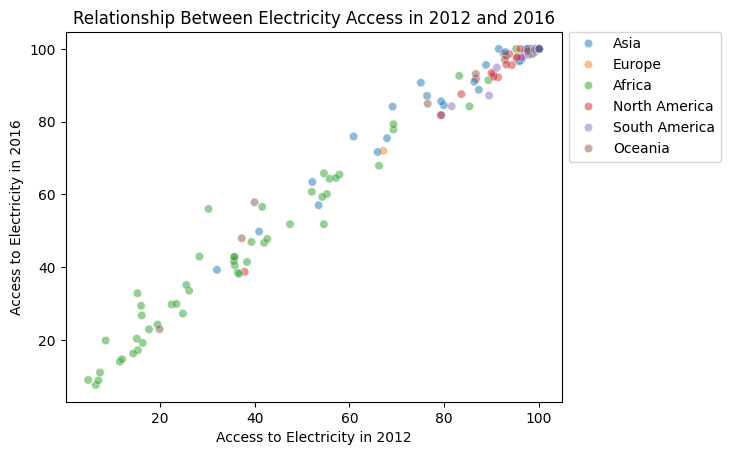

In [46]:
sns.scatterplot(data = electricity,x = '2012',y = '2016',hue = 'Continent',alpha = 0.5)
plt.title('Relationship Between Electricity Access in 2012 and 2016')
plt.xlabel('Access to Electricity in 2012')
plt.ylabel('Access to Electricity in 2016')
plt.legend(bbox_to_anchor=(1,1.02))
plt.show()

This histogram shows the distribution of progress in access to electricity between 2012 and 2016 across all countries.
in many countries that value concentrated around zero , means that the electrification levels were already high in these countries.
however,countries in Africa and parts of Asia had a significant gains during that period.
The histogram confirms that while global electrification improved overall, the greatest progress occurred in a limited number of developing countries starting from lower access levels.

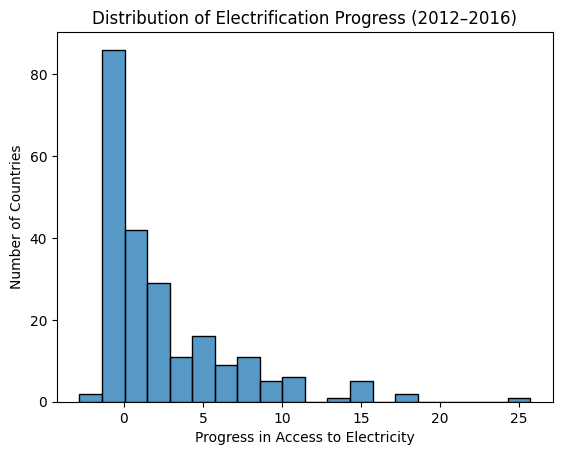

In [44]:
sns.histplot(x = electricity['Progress'],bins = 20)
plt.title('Distribution of Electrification Progress (2012–2016)')
plt.xlabel('Progress in Access to Electricity')
plt.ylabel('Number of Countries')
plt.show()


This boxplot illustrates the distribution of electricity access among South American countries in 2016.  
The median value is very high, close to 100%, showing that most South American countries have achieved near-universal access to electricity.the small outliers shows that there are still some countries that behind the full access to electricity but overally South America shows one of the most uniform and advanced continent in electrification.  

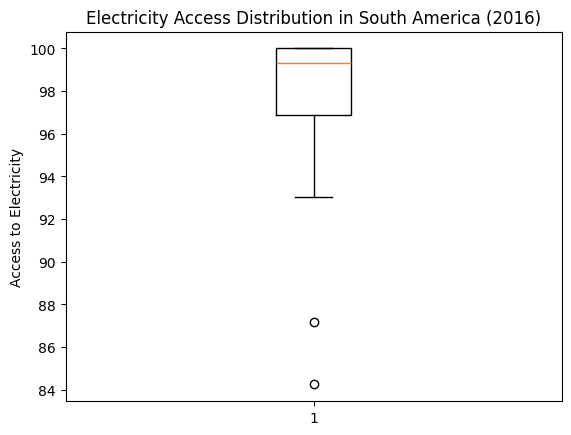

In [41]:
electricity_SM = electricity[(electricity['Continent'] == 'South America') ]
plt.boxplot(x = electricity_SM['2016'])
plt.title('Electricity Access Distribution in South America (2016)')
plt.ylabel('Access to Electricity')
plt.show()

This bar chart compares the average progress in access to electricity between 2012 and 2016 across all the continents.
Africa shows the highest improvements,followed by Asia and Oceania.however,Europe and America (North and South)
shows the minimal change,demonstrate that they already experienced high level of access to electricity from 2012.about the vertical black line on each bar if its shorter it shows higher variation in data about that continent, shorter line shows less variation in that continent.so again Europe,North America and South Amercia were more stable t

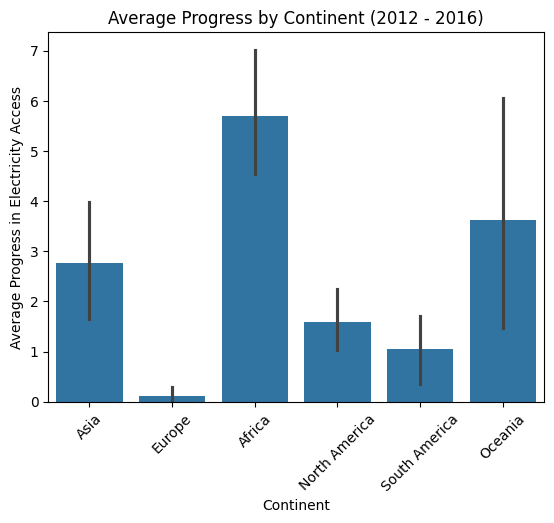

In [42]:
sns.barplot(data=electricity, x='Continent', y='Progress')

plt.title('Average Progress by Continent (2012 - 2016)')
plt.xlabel('Continent')
plt.ylabel('Average Progress in Electricity Access')
plt.xticks(rotation = 45)
plt.show()

This plot shows the accesibility to electricity across all continents.
Europe,North America and South America shows extremely high and consistent condition.
Africa has the lowest median and widest spread, reflecting strong variation amon its countiers. Oceania and Asia shows relatively high average but few outliers below 80%.

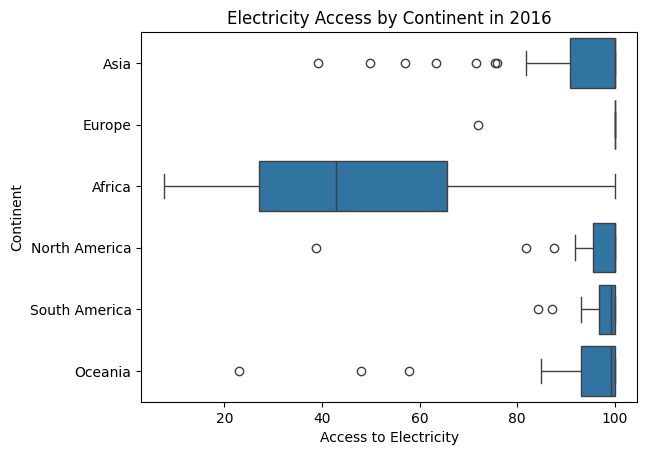

In [60]:
sns.boxplot(data=electricity,x='2016',y='Continent')
plt.title('Electricity Access by Continent in 2016')
plt.xlabel('Access to Electricity')
plt.ylabel('Continent')
plt.show()


This regression shows how the starting level of electricity access in 2012 relates to the progress that was made from 2012 to 2016 in African countries.
negative slope shows that countries with lower initial access shows greater achievement during the period.also points that are far from the regression line show that they dont follow the prediction ( it could be improvement more than expected or less than expected).

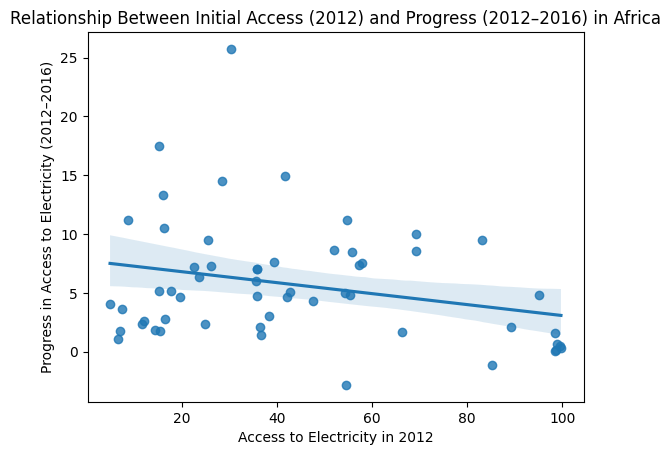

In [61]:
sns.regplot(data = electricity[electricity['Continent']== 'Africa'],
            x = '2012', y = 'Progress')
plt.title('Relationship Between Initial Access (2012) and Progress (2012–2016) in Africa')
plt.xlabel('Access to Electricity in 2012')
plt.ylabel('Progress in Access to Electricity (2012–2016)')
plt.show()

 # Final comment including a summary of the findings and possible future developments.

###Conclusion:
The data shows that all regions improved their electricity access level over a 5 year period though with different pace and progress.
Africa shows the highest level of improvement,though this continent is still behind the others in terms of total develompment.
Asia and Oceania demonstrate steady growth over this period
While Europe,North Amrica and South America maintained nearly complete access to the electricity.
overall, it shows the positive impact of global electrification program under sustainable development goals.


###Future Work:
maybe it would be good to extend the timeline and include more data from recent years.
Also in can be included the data related to GDP and the level of education
to this calculation.
in addition in could be good to do group countries with similar developing pattern to predict the future access level based on historical data.